## Convolutional Neural Network

In [174]:
# Experiment No 5- Implementation of Convolution neural networks
# Demonstrate the implementation Conv, Pool, Activation, Fully connected layers

In [175]:
# Code By Bhavy Kharbanda
# Sap Id: 500082531

### Lab 5 : Original File

In [176]:
# Importing the libraries
import torch  # Importing torch
import torchvision
from torchvision.datasets import CIFAR10 # Importing the dataset
import torch.nn as nn # For neural network
import torch.nn.functional as F   # For functions in neural netork
import torchvision.transforms as transforms  # For transfoming images to tensor objects
from torch.utils.data import DataLoader  # For loading the data
from torchsummary import summary
from torchvision.utils import make_grid # For making a grid summary

# Importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [177]:
# CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class.

In [178]:
# Transforming the dataset to tensor objects
tfms=transforms.Compose([transforms.ToTensor()])
train_data=CIFAR10(root='./data',train=True,transform=tfms,download=True)
test_data=CIFAR10(root='./data',train=False,transform=tfms,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [179]:
# Declaring the batch size, learning rate, kernel size, and the device gpu or cpu.
batch_size=32
lr=.01
karnal_size=3

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [180]:
# Loading the datasets in train and test models.
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [181]:
# Creating a trainer to iterate in the images.
trainiter=iter(train_loader)
images,labels=trainiter.next()
images.shape

torch.Size([32, 3, 32, 32])

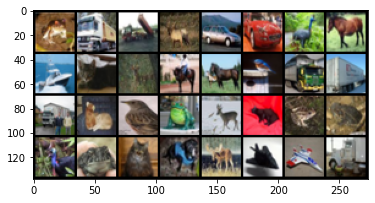

In [182]:
# Showing the image on the grid
plt.imshow((make_grid(images).numpy().transpose((1,2,0))))

In [183]:
# Function to define the convolutional layer.
# Max pooling layer of 2X2.
# Relu activation function.
def conv_layer(in_channels,out_channels,kernel_size):

    return nn.Sequential(
        nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
    
        )

In [184]:
# Developing the Convolutional Net using three convolutional layer, flatten layer.
class Conv_net(nn.Module):
    def __init__(self):
        super(Conv_net, self).__init__()
        self.layer1=conv_layer(3,16,3)
        self.layer2=conv_layer(16,32,3)
        self.layer3=conv_layer(32,64,3)
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(64*2*2,50)
        self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.flatten(x)
        x=self.fc1(x)
        x=self.fc2(x)
        return x

In [185]:
# Calling the model.
model=Conv_net()
model.to(device)
model

Conv_net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=256, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [186]:
# Displaying the summary of the model. 
summary(model=model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
         MaxPool2d-2           [-1, 16, 15, 15]               0
              ReLU-3           [-1, 16, 15, 15]               0
            Conv2d-4           [-1, 32, 13, 13]           4,640
         MaxPool2d-5             [-1, 32, 6, 6]               0
              ReLU-6             [-1, 32, 6, 6]               0
            Conv2d-7             [-1, 64, 4, 4]          18,496
         MaxPool2d-8             [-1, 64, 2, 2]               0
              ReLU-9             [-1, 64, 2, 2]               0
          Flatten-10                  [-1, 256]               0
           Linear-11                   [-1, 50]          12,850
           Linear-12                   [-1, 10]             510
Total params: 36,944
Trainable params: 36,944
Non-trainable params: 0
---------------------------------

In [187]:
# Declaring the loss function, cross entropy loss and using the Adam optimixzer. 
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

In [188]:
# Training the model.
def train(mode,trainloader,loss_fn=None,optimizer=None,seed=32,EPOCHS=100):
    torch.manual_seed(seed)
    cost=[]
    
    model.to(device)
    for epoch in range(EPOCHS):
        train_corr=[]
        for idx,(img,lbl) in enumerate(trainloader):

            # 1.Compute the Output
            img,lbl=img.to(device),lbl.to(device)
            yhat=model(img)
            
            # 2.Compute the Loss
            loss=loss_fn(yhat,lbl)

            # 3.Compute the gradients
            optimizer.zero_grad()
            loss.backward()

            # 4.Update the model parameters
            optimizer.step()
            with torch.no_grad():
                yhat=model(img)
                loss=loss_fn(yhat,lbl)
                core_lbl=(torch.argmax(F.softmax(yhat,dim=1),dim=1)==lbl).sum().item()

                # print('Model accuracy on this batch %.2f', core_lbl)
                train_corr.append(core_lbl)
        with torch.no_grad():
            acc=sum(train_corr)/len(train_data)*100
            
            print(f'After {epoch+1} Model Training Accuracy {acc}')

In [189]:
# Length of training data
len(train_data)

50000

In [190]:
# Calling the model for loss after every epoch.
model=Conv_net()
cost=train(mode=model,trainloader=train_loader,loss_fn=loss_fn,optimizer=optimizer,EPOCHS=10)

After 1 Model Training Accuracy 10.0
After 2 Model Training Accuracy 10.0
After 3 Model Training Accuracy 10.0
After 4 Model Training Accuracy 10.0
After 5 Model Training Accuracy 10.0
After 6 Model Training Accuracy 10.0
After 7 Model Training Accuracy 10.0
After 8 Model Training Accuracy 10.0
After 9 Model Training Accuracy 10.0
After 10 Model Training Accuracy 10.0
